In [1]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow

In [2]:
df = pl.read_csv("City_Types.csv")
df.show(1)

Date,City,CO,NO2,SO2,O3,PM2.5,PM10,Type
str,str,f64,f64,f64,f64,f64,f64,str
"""2024-01-01 00:00:00+00:00""","""Moscow""",208.0,15.9,13.2,44.0,8.6,9.4,"""Industrial"""


In [3]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## Basic Information

In [4]:
print(f"Number of rows: {df.height}")
print(f"Number of columns: {df.width}")
print(f"\nColumn names and types:")
print(df.schema)
print(f"\nFirst 5 rows:")
print(df.head())

Number of rows: 52704
Number of columns: 9

Column names and types:
Schema({'Date': String, 'City': String, 'CO': Float64, 'NO2': Float64, 'SO2': Float64, 'O3': Float64, 'PM2.5': Float64, 'PM10': Float64, 'Type': String})

First 5 rows:
shape: (5, 9)
┌───────────────────────────┬────────┬───────┬──────┬───┬──────┬───────┬──────┬────────────┐
│ Date                      ┆ City   ┆ CO    ┆ NO2  ┆ … ┆ O3   ┆ PM2.5 ┆ PM10 ┆ Type       │
│ ---                       ┆ ---    ┆ ---   ┆ ---  ┆   ┆ ---  ┆ ---   ┆ ---  ┆ ---        │
│ str                       ┆ str    ┆ f64   ┆ f64  ┆   ┆ f64  ┆ f64   ┆ f64  ┆ str        │
╞═══════════════════════════╪════════╪═══════╪══════╪═══╪══════╪═══════╪══════╪════════════╡
│ 2024-01-01 00:00:00+00:00 ┆ Moscow ┆ 208.0 ┆ 15.9 ┆ … ┆ 44.0 ┆ 8.6   ┆ 9.4  ┆ Industrial │
│ 2024-01-01 01:00:00+00:00 ┆ Moscow ┆ 207.0 ┆ 17.4 ┆ … ┆ 44.0 ┆ 8.6   ┆ 10.5 ┆ Industrial │
│ 2024-01-01 02:00:00+00:00 ┆ Moscow ┆ 217.0 ┆ 19.0 ┆ … ┆ 43.0 ┆ 10.4  ┆ 12.9 ┆ Industrial │
│ 202

## Summary Statistics

In [5]:
numeric_cols = [col for col in df.columns if df[col].dtype in [pl.Float64, pl.Float32, pl.Int64, pl.Int32, pl.Int16, pl.Int8]]

if numeric_cols:
    summary_stats = df.select(numeric_cols).describe()
    print(summary_stats)

    print("\nAdditional Statistics:")
    for col in numeric_cols:
        print(f"\n{col}:")
        print(f"  Skewness: {df[col].skew():.4f}")
        print(f"  Kurtosis: {df[col].kurtosis():.4f}")
else:
    print("No numerical columns found.")

shape: (9, 7)
┌────────────┬────────────┬───────────┬───────────┬───────────┬───────────┬───────────┐
│ statistic  ┆ CO         ┆ NO2       ┆ SO2       ┆ O3        ┆ PM2.5     ┆ PM10      │
│ ---        ┆ ---        ┆ ---       ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│ str        ┆ f64        ┆ f64       ┆ f64       ┆ f64       ┆ f64       ┆ f64       │
╞════════════╪════════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│ count      ┆ 52704.0    ┆ 52704.0   ┆ 52704.0   ┆ 52704.0   ┆ 52704.0   ┆ 52704.0   │
│ null_count ┆ 0.0        ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       │
│ mean       ┆ 508.030472 ┆ 29.616492 ┆ 22.38725  ┆ 53.423668 ┆ 32.931045 ┆ 50.64498  │
│ std        ┆ 692.274824 ┆ 23.984409 ┆ 34.285823 ┆ 42.225556 ┆ 43.833691 ┆ 67.311502 │
│ min        ┆ 0.0        ┆ 0.9       ┆ 0.0       ┆ 0.0       ┆ 0.3       ┆ 0.4       │
│ 25%        ┆ 187.0      ┆ 11.0      ┆ 0.7       ┆ 26.0      ┆ 6.4       ┆ 9.4       │
│ 50%        ┆ 268

## Distribution plots

✓ Histograms saved as 'histograms.png'


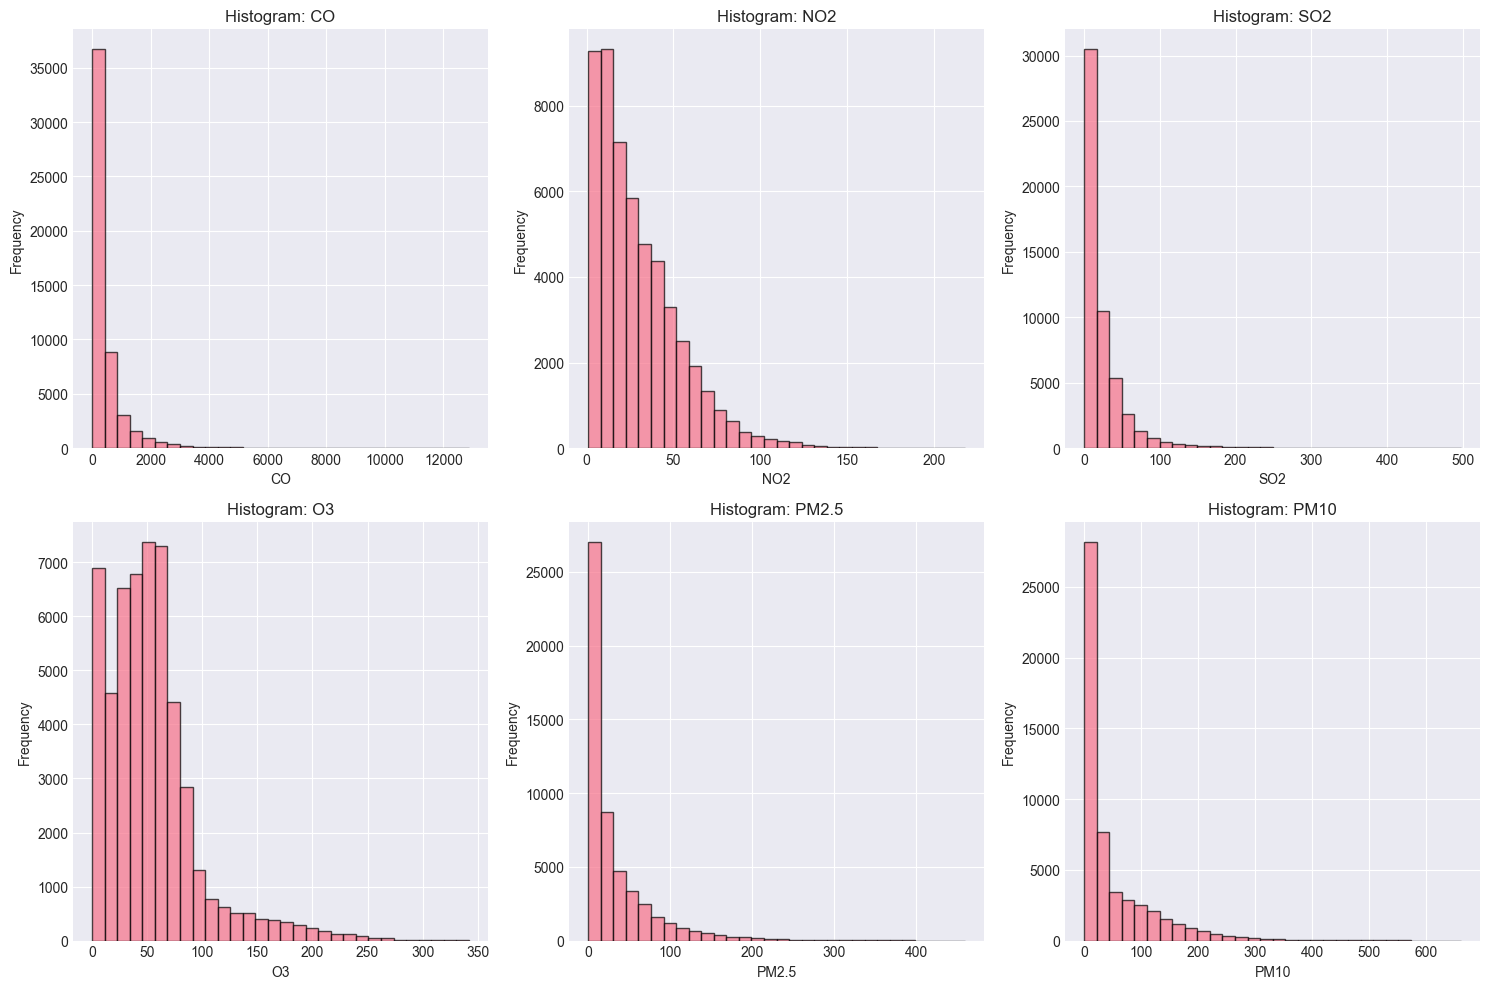

In [6]:
n_cols = len(numeric_cols)
n_rows = (n_cols + 2) // 3

fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_cols > 1 else [axes]

for idx, col in enumerate(numeric_cols):
    data = df[col].drop_nulls().to_numpy()
    axes[idx].hist(data, bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Histogram: {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

for idx in range(len(numeric_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('histograms.png', dpi=300, bbox_inches='tight')
print("✓ Histograms saved as 'histograms.png'")
plt.show()

✓ Boxplots saved as 'boxplots.png'


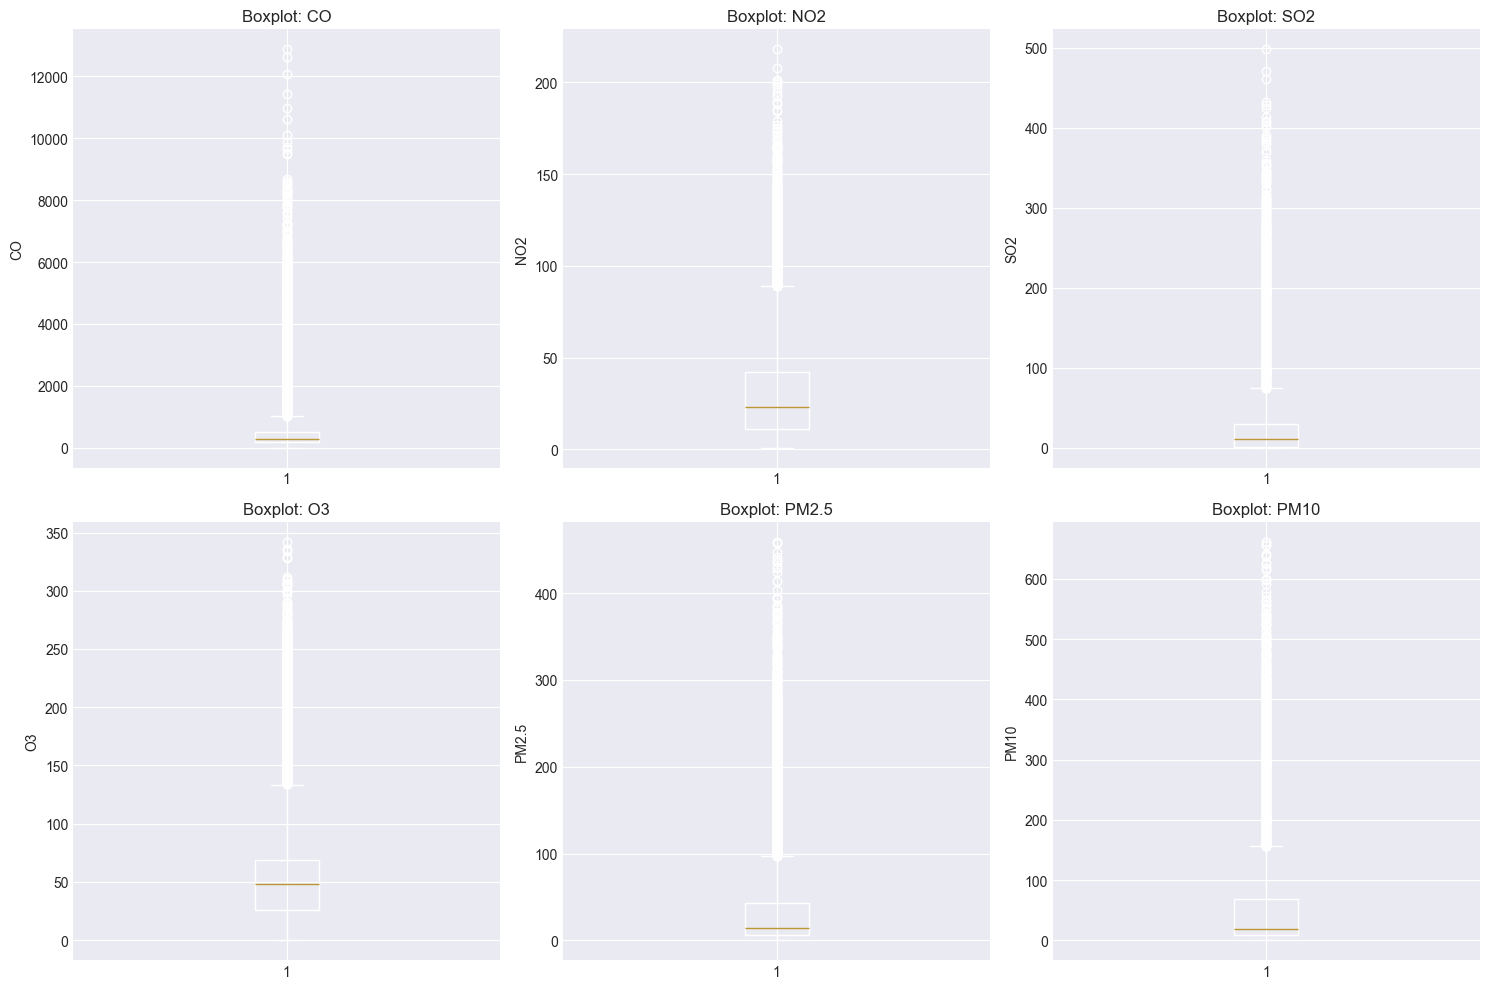

In [7]:
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_cols > 1 else [axes]

for idx, col in enumerate(numeric_cols):
    data = df[col].drop_nulls().to_numpy()
    axes[idx].boxplot(data, vert=True)
    axes[idx].set_title(f'Boxplot: {col}')
    axes[idx].set_ylabel(col)

for idx in range(len(numeric_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('boxplots.png', dpi=300, bbox_inches='tight')
print("✓ Boxplots saved as 'boxplots.png'")
plt.show()

✓ KDE plots saved as 'kde_plots.png'


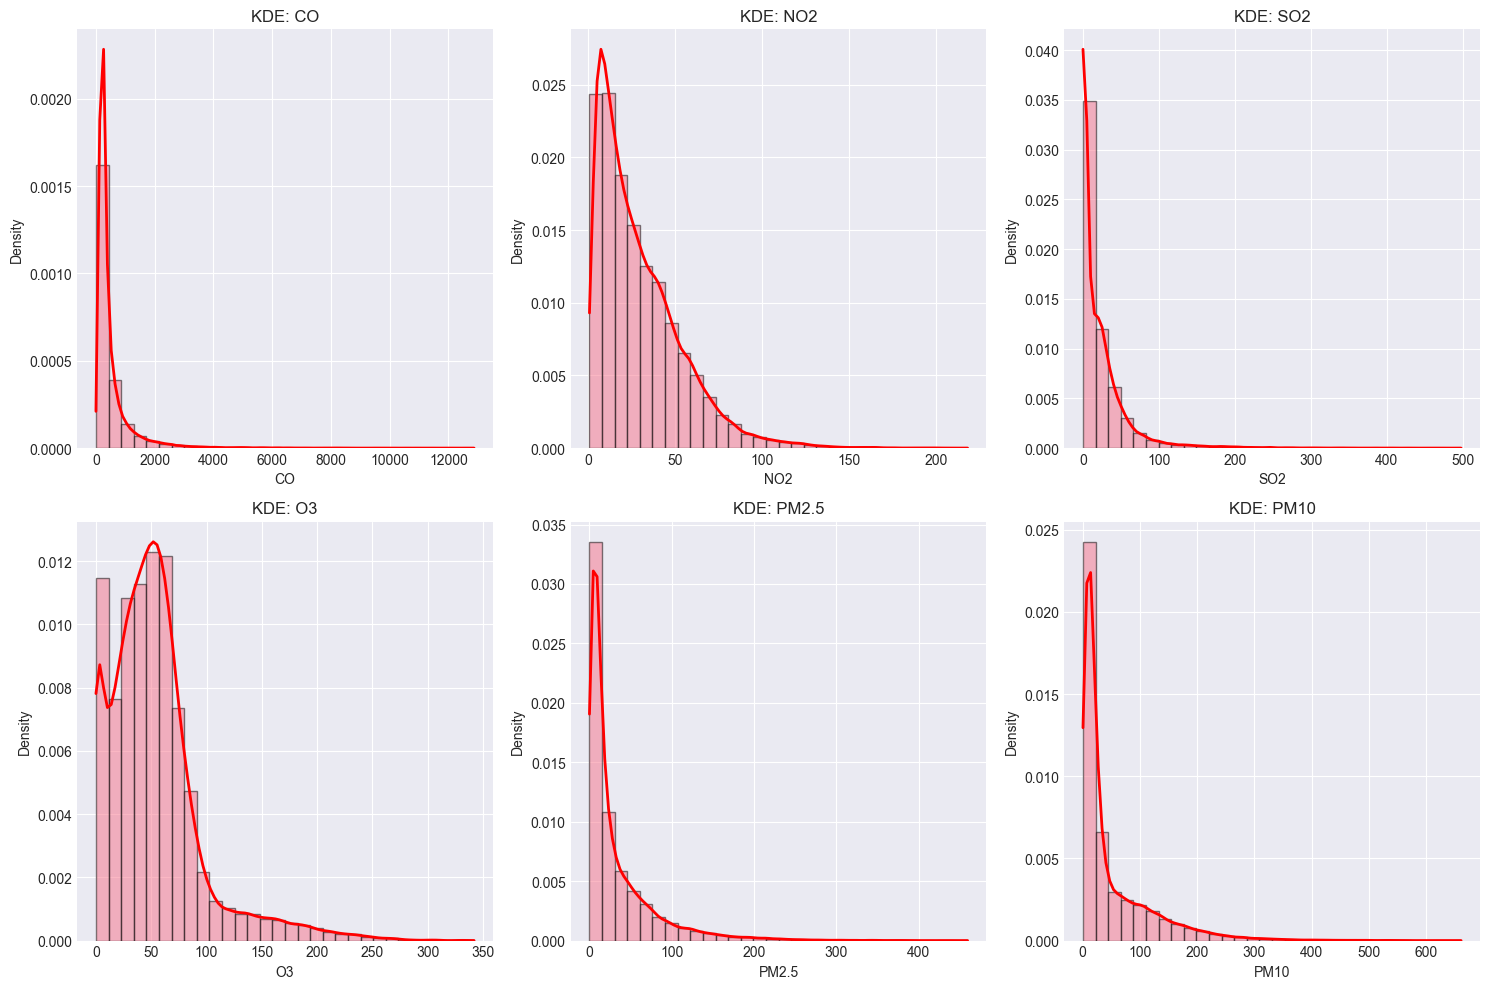

In [8]:
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_cols > 1 else [axes]

for idx, col in enumerate(numeric_cols):
    data = df[col].drop_nulls().to_numpy()
    axes[idx].hist(data, bins=30, density=True, alpha=0.5, edgecolor='black')
    from scipy.stats import gaussian_kde
    kde = gaussian_kde(data)
    x_range = np.linspace(data.min(), data.max(), 100)
    axes[idx].plot(x_range, kde(x_range), 'r-', linewidth=2)
    axes[idx].set_title(f'KDE: {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Density')

for idx in range(len(numeric_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('kde_plots.png', dpi=300, bbox_inches='tight')
print("✓ KDE plots saved as 'kde_plots.png'")
plt.show()

## Categorical data analysis


City:
shape: (6, 2)
┌───────────┬───────┐
│ City      ┆ count │
│ ---       ┆ ---   │
│ str       ┆ u32   │
╞═══════════╪═══════╡
│ Zurich    ┆ 8784  │
│ Delhi     ┆ 8784  │
│ Vancouver ┆ 8784  │
│ Beijing   ┆ 8784  │
│ Moscow    ┆ 8784  │
│ Stockholm ┆ 8784  │
└───────────┴───────┘
✓ Bar chart saved as 'barchart_City.png'


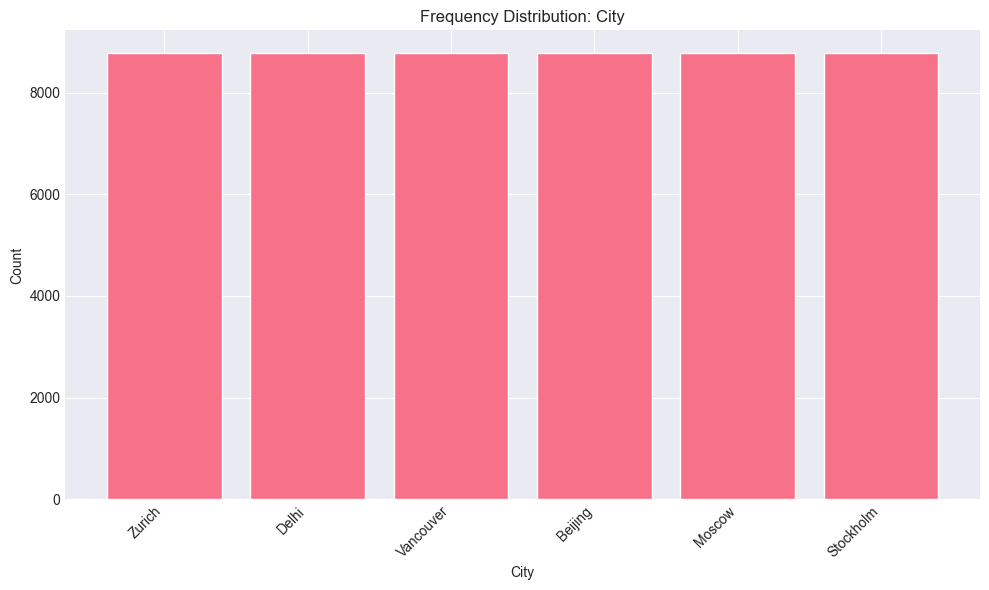


Type:
shape: (2, 2)
┌─────────────┬───────┐
│ Type        ┆ count │
│ ---         ┆ ---   │
│ str         ┆ u32   │
╞═════════════╪═══════╡
│ Residential ┆ 26352 │
│ Industrial  ┆ 26352 │
└─────────────┴───────┘
✓ Bar chart saved as 'barchart_Type.png'


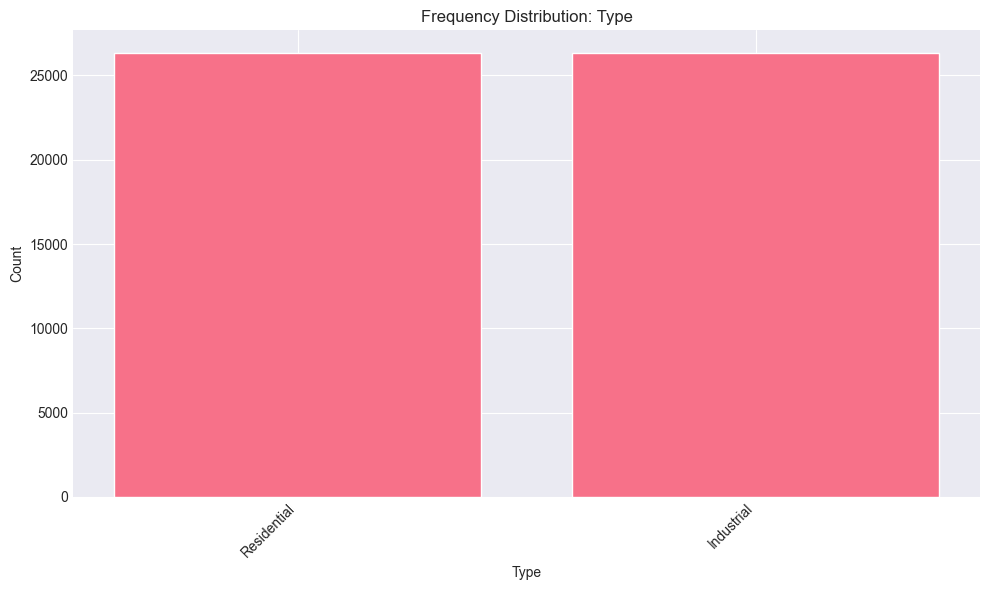

In [9]:
categorical_cols = [col for col in df.columns if (df[col].dtype == pl.Utf8 or df[col].dtype == pl.Categorical) and col != 'Date']

for col in categorical_cols:
    print(f"\n{col}:")
    freq_table = df.group_by(col).agg(pl.len().alias('count')).sort('count', descending=True)
    print(freq_table)

    plt.figure(figsize=(10, 6))
    data = freq_table.to_pandas()
    plt.bar(data[col].astype(str), data['count'])
    plt.title(f'Frequency Distribution: {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'barchart_{col}.png', dpi=300, bbox_inches='tight')
    print(f"✓ Bar chart saved as 'barchart_{col}.png'")
    plt.show()

## Correlation between features


Correlation Matrix:
             CO       NO2       SO2        O3     PM2.5      PM10
CO     1.000000  0.555477  0.806088 -0.244973  0.857725  0.726941
NO2    0.555477  1.000000  0.624323 -0.462074  0.649295  0.557913
SO2    0.806088  0.624323  1.000000 -0.260594  0.857254  0.724543
O3    -0.244973 -0.462074 -0.260594  1.000000 -0.151040 -0.010099
PM2.5  0.857725  0.649295  0.857254 -0.151040  1.000000  0.901894
PM10   0.726941  0.557913  0.724543 -0.010099  0.901894  1.000000
✓ Correlation heatmap saved as 'correlation_heatmap.png'


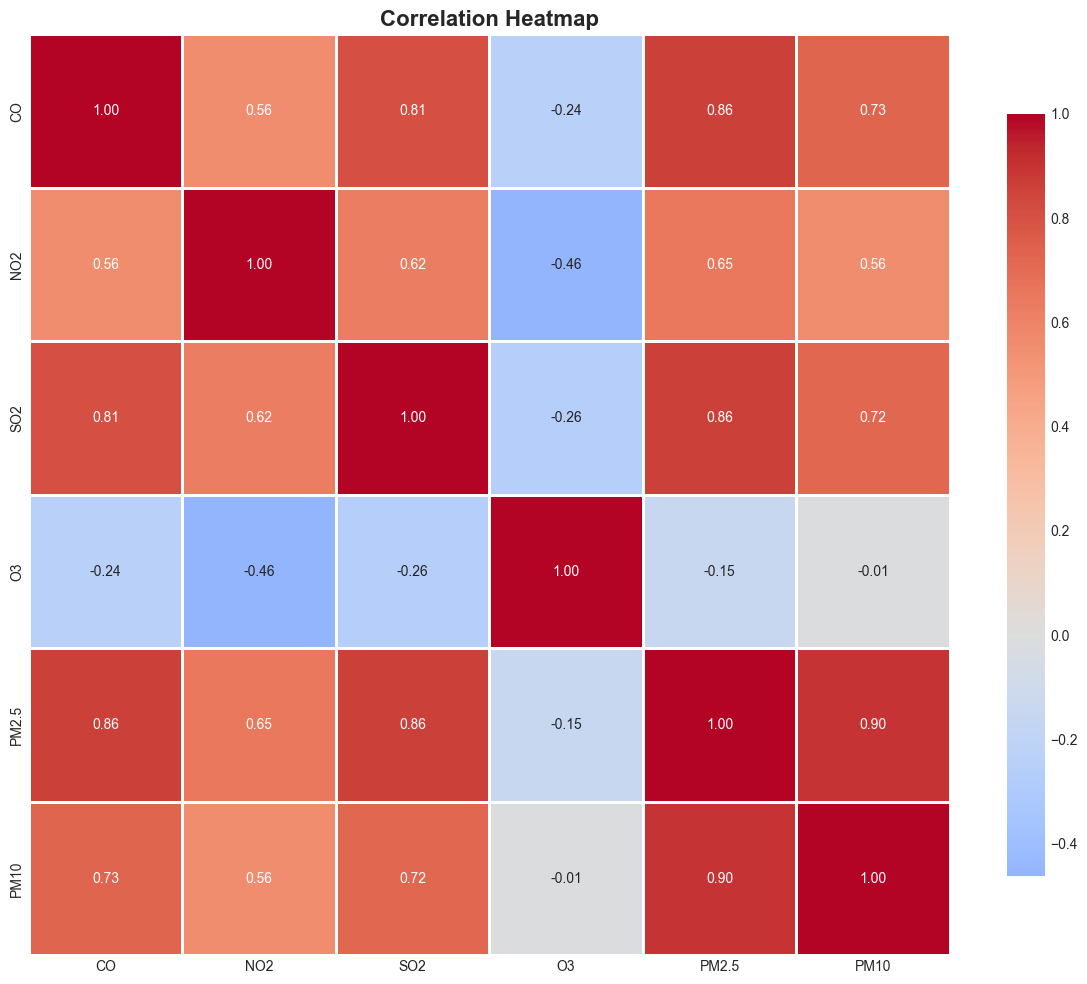


Strong Correlations (|r| > 0.7):
  CO ↔ SO2: 0.806
  CO ↔ PM2.5: 0.858
  CO ↔ PM10: 0.727
  SO2 ↔ PM2.5: 0.857
  SO2 ↔ PM10: 0.725
  PM2.5 ↔ PM10: 0.902


In [10]:
corr_matrix = df.select(numeric_cols).to_pandas().corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
print("✓ Correlation heatmap saved as 'correlation_heatmap.png'")
plt.show()

# Find strong correlations
print("\nStrong Correlations (|r| > 0.7):")
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            print(f"  {corr_matrix.columns[i]} ↔ {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.3f}")

In [11]:
missing_data = []
for col in df.columns:
    null_count = df[col].null_count()
    if null_count > 0:
        missing_data.append({
            'Column': col,
            'Missing_Count': null_count,
            'Percentage': f"{(null_count / df.height) * 100:.2f}%"
        })

if missing_data:
    missing_df = pl.DataFrame(missing_data)
    print(missing_df)

    plt.figure(figsize=(10, 6))
    cols = [item['Column'] for item in missing_data]
    counts = [item['Missing_Count'] for item in missing_data]
    plt.barh(cols, counts, color='coral')
    plt.xlabel('Number of Missing Values')
    plt.title('Missing Data by Column')
    plt.tight_layout()
    plt.savefig('missing_data.png', dpi=300, bbox_inches='tight')
    print("✓ Missing data plot saved as 'missing_data.png'")
    plt.show()
else:
    print("No missing data found!")

No missing data found!
